In [32]:
import os

# Set cache directories for XDG and Hugging Face Hub
os.environ['XDG_CACHE_HOME'] = '/home/msds2023/jlegara/.cache'
os.environ['HUGGINGFACE_HUB_CACHE'] = '/home/msds2023/jlegara/.cache'

import torch

# Set device to GPU if available, otherwise use CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import seaborn as sns
from tqdm.notebook import tqdm

from moviepy.editor import VideoFileClip, ImageSequenceClip

from transformers import (AutoFeatureExtractor,
                          AutoModelForImageClassification,
                          AutoConfig)

from PIL import Image, ImageDraw

Running on device: cuda:0


In [2]:
pip install facenet-pytorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.2 MB/s eta 0:00:00


In [3]:

import cv2
import torch
from facenet_pytorch import MTCNN

# Set device to cuda:0 if available, otherwise use cpu
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Load pre-trained MTCNN model
mtcnn = MTCNN(keep_all=True, device=device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
# Load your video
scene = 'Pitch Video.mp4'
clip = VideoFileClip(scene)

# Save video frames per second
vid_fps = clip.fps

# Get the video (as frames)
video = clip.without_audio()
video_data = np.array(list(video.iter_frames()))

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+



In [5]:
def detect_emotions(image):
    """
    Detect emotions from a given image, displays the detected
    face and the emotion probabilities in a bar plot.

    Parameters:
    image (PIL.Image): The input image.

    Returns:
    PIL.Image: The cropped face from the input image.
    """

    # Create a copy of the image to draw on
    temporary = image.copy()

    # Use the MTCNN model to detect faces in the image
    sample = mtcnn.detect(temporary)

    # If a face is detected
    if sample[0] is not None:

        # Get the bounding box coordinates of the face
        box = sample[0][0]

        # Crop the detected face from the image
        face = temporary.crop(box)

        # Pre-process the cropped face to be fed into the
        # emotion detection model
        inputs = extractor(images=face, return_tensors="pt")

        # Pass the pre-processed face through the model to
        # get emotion predictions
        outputs = model(**inputs)

        # Apply softmax to the logits to get probabilities
        probabilities = torch.nn.functional.softmax(outputs.logits,
                                                    dim=-1)

        # Retrieve the id2label attribute from the configuration
        id2label = AutoConfig.from_pretrained(
            "trpakov/vit-face-expression"
        ).id2label

        # Convert probabilities tensor to a Python list
        probabilities = probabilities.detach().numpy().tolist()[0]

        # Map class labels to their probabilities
        class_probabilities = {id2label[i]: prob for i,
                               prob in enumerate(probabilities)}

        # Define colors for each emotion
        colors = {
            "angry": "red",
            "disgust": "green",
            "fear": "gray",
            "happy": "yellow",
            "neutral": "purple",
            "sad": "blue",
            "surprise": "orange"
        }
        palette = [colors[label] for label in class_probabilities.keys()]

        # Prepare a figure with 2 subplots: one for the face image,
        # one for the bar plot
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))

        # Display the cropped face in the left subplot
        axs[0].imshow(np.array(face))
        axs[0].axis('off')

        # Create a horizontal bar plot of the emotion probabilities in
        # the right subplot
        sns.barplot(ax=axs[1],
                    y=list(class_probabilities.keys()),
                    x=[prob * 100 for prob in class_probabilities.values()],
                    palette=palette,
                    orient='h')
        axs[1].set_xlabel('Probability (%)')
        axs[1].set_title('Emotion Probabilities')
        axs[1].set_xlim([0, 100])  # Set x-axis limits to show percentages

        # Show the plot
        plt.show()

In [6]:
pip install transformers

In [7]:
from transformers import AutoFeatureExtractor, AutoTokenizer

In [8]:
from transformers import AutoModelForImageClassification, AutoTokenizer
import torch

In [9]:
# Initialize MTCNN model for single face cropping
mtcnn = MTCNN(
    image_size=160,
    margin=0,
    min_face_size=200,
    thresholds=[0.6, 0.7, 0.7],
    factor=0.709,
    post_process=True,
    keep_all=False,
    device=device
)

# Load the pre-trained model and feature extractor
extractor = AutoFeatureExtractor.from_pretrained(
    "trpakov/vit-face-expression"
)
model = AutoModelForImageClassification.from_pretrained(
    "trpakov/vit-face-expression"
)

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

  warnings.warn(



config.json:   0%|          | 0.00/915 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

In [10]:
pip install pillow


In [11]:
from PIL import Image

In [12]:
# Choose a frame
frame = video_data[10]  # choosing the 10th frame

# Convert the frame to a PIL image and display it
image = Image.fromarray(frame)
detect_emotions(image)

In [13]:
# Choose a frame
frame = video_data[840]  # choosing the 40th frame

# Convert the frame to a PIL image and display it
image = Image.fromarray(frame)
detect_emotions(image)

In [14]:
def detect_emotions(image):
    """
    Detect emotions from a given image.
    Returns a tuple of the cropped face image and a
    dictionary of class probabilities.
    """
    temporary = image.copy()

    # Detect faces in the image using the MTCNN group model
    sample = mtcnn.detect(temporary)
    if sample[0] is not None:
        box = sample[0][0]

        # Crop the face
        face = temporary.crop(box)

        # Pre-process the face
        inputs = extractor(images=face, return_tensors="pt")

        # Run the image through the model
        outputs = model(**inputs)

        # Apply softmax to the logits to get probabilities
        probabilities = torch.nn.functional.softmax(outputs.logits,
                                                    dim=-1)

        # Retrieve the id2label attribute from the configuration
        config = AutoConfig.from_pretrained(
            "trpakov/vit-face-expression"
        )
        id2label = config.id2label

        # Convert probabilities tensor to a Python list
        probabilities = probabilities.detach().numpy().tolist()[0]

        # Map class labels to their probabilities
        class_probabilities = {
            id2label[i]: prob for i, prob in enumerate(probabilities)
        }

        return face, class_probabilities
    return None, None

In [18]:
from transformers import AutoConfig, AutoModelForImageClassification, AutoTokenizer


In [19]:
def create_combined_image(face, class_probabilities):
    """
    Create an image combining the detected face and a barplot
    of the emotion probabilities.

    Parameters:
    face (PIL.Image): The detected face.
    class_probabilities (dict): The probabilities of each
        emotion class.

    Returns:
    np.array: The combined image as a numpy array.
    """
    # Define colors for each emotion
    colors = {
        "angry": "red",
        "disgust": "green",
        "fear": "gray",
        "happy": "yellow",
        "neutral": "purple",
        "sad": "blue",
        "surprise": "orange"
    }
    palette = [colors[label] for label in class_probabilities.keys()]

    # Create a figure with 2 subplots: one for the
    # face image, one for the barplot
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Display face on the left subplot
    axs[0].imshow(np.array(face))
    axs[0].axis('off')

    # Create a barplot of the emotion probabilities
    # on the right subplot
    sns.barplot(ax=axs[1],
                y=list(class_probabilities.keys()),
                x=[prob * 100 for prob in class_probabilities.values()],
                palette=palette,
                orient='h')
    axs[1].set_xlabel('Probability (%)')
    axs[1].set_title('Emotion Probabilities')
    axs[1].set_xlim([0, 100])  # Set x-axis limits

    # Convert the figure to a numpy array
    canvas = FigureCanvas(fig)
    canvas.draw()
    img = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    img  = img.reshape(canvas.get_width_height()[::-1] + (3,))

    plt.close(fig)
    return img

In [20]:
skips = 2
reduced_video = []

for i in tqdm(range(0, len(video_data), skips)):
    reduced_video.append(video_data[i])

  0%|          | 0/1740 [00:00<?, ?it/s]

In [21]:
# Define a list of emotions
emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# List to hold the combined images
combined_images = []

# Create a list to hold the class probabilities for all frames
all_class_probabilities = []

# Loop over video frames
for i, frame in tqdm(enumerate(reduced_video),
                     total=len(reduced_video),
                     desc="Processing frames"):
    # Convert frame to uint8
    frame = frame.astype(np.uint8)

    # Call detect_emotions to get face and class probabilities
    face, class_probabilities = detect_emotions(Image.fromarray(frame))

    # If a face was found
    if face is not None:
        # Create combined image for this frame
        combined_image = create_combined_image(face, class_probabilities)

        # Append combined image to the list
        combined_images.append(combined_image)
    else:
        # If no face was found, set class probabilities to None
        class_probabilities = {emotion: None for emotion in emotions}

    # Append class probabilities to the list
    all_class_probabilities.append(class_probabilities)

Processing frames:   0%|          | 0/1740 [00:00<?, ?it/s]

In [22]:
# Convert list of images to video clip
print(combined_images)
clip_with_plot = ImageSequenceClip(combined_images, fps=vid_fps/skips)
 # Choose the frame rate (fps) according to your requirement
print(type(combined_images), len(combined_images))
# Write the video to a file with a specific frame rate
clip_with_plot.write_videofile("output_video.mp4", fps=vid_fps/skips)

# Display the clip
clip_with_plot.ipython_display(width=900)

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

Moviepy - Done !
Moviepy - video ready output_video.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, mean_squared_error, matthews_corrcoef


In [26]:

# Generate example data
np.random.seed(42)
X = np.random.rand(100, 10)  # Replace with your feature data
y = np.random.choice(['happy', 'sad', 'angry'], size=100)  # Replace with your target labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple classifier (replace with your emotion detection model)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Encode emotion labels for binary classification
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)



Confusion Matrix:
[[2 1 2]
 [5 1 2]
 [4 0 3]]

Classification Report:
              precision    recall  f1-score   support

       angry       0.18      0.40      0.25         5
       happy       0.50      0.12      0.20         8
         sad       0.43      0.43      0.43         7

    accuracy                           0.30        20
   macro avg       0.37      0.32      0.29        20
weighted avg       0.40      0.30      0.29        20


Accuracy: 0.3

Precision: 0.39545454545454545
Recall: 0.3
F1-Score: 0.29250000000000004


  mask |= (ar1 == a)

  warnings.warn(

  mask |= (ar1 == a)

  warnings.warn(

  mask |= (ar1 == a)

  warnings.warn(



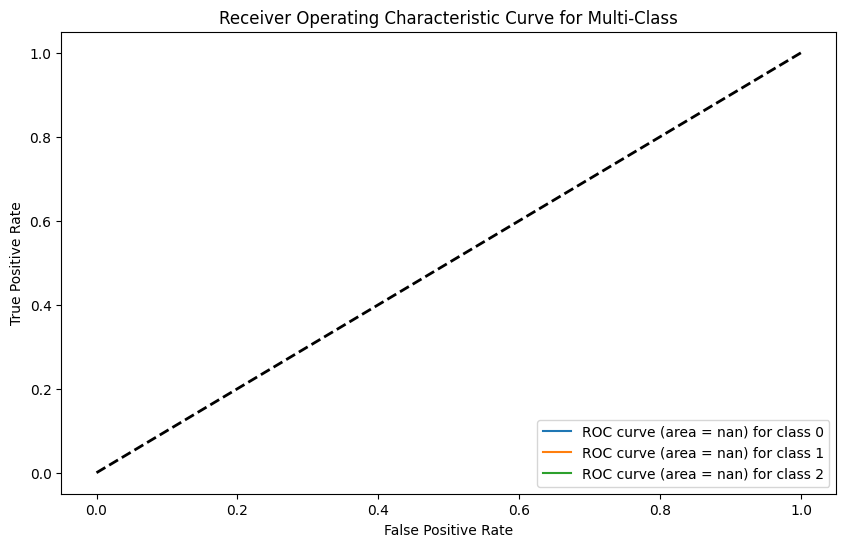

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate example data
np.random.seed(42)
X = np.random.rand(100, 10)  # Replace with your feature data
y = np.random.choice(['happy', 'sad', 'angry'], size=100)  # Replace with your target labels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple classifier (replace with your emotion detection model)
clf = OneVsRestClassifier(RandomForestClassifier(random_state=42))
y_score = clf.fit(X_train, label_binarize(y_train, classes=['happy', 'sad', 'angry'])).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=clf.classes_)[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(clf.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {clf.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()
